In [89]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

#Librerías para modelos

#k-neighbors
from sklearn.neighbors import KNeighborsClassifier
#SVC
from sklearn.svm import SVC
#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Regresión logística
from sklearn.linear_model import LogisticRegression
#Para agrupar clasificadores
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Para representar el arbol

import pydotplus
from IPython.display import Image
from sklearn import tree


#Clase_20180915_Classification - Pima Indians

In [90]:
pd.options.display.max_columns= None

In [91]:
df=pd.read_csv('../data_processed/data_processed_definitive.csv',sep=';',index_col=False,parse_dates=['FECHA'])
df.head(3)

,FECHA,PERIODO,MES,WD,PRECIO_MD_ESP,ACOPLADO_FR,RESERVA_D-1,P48_EOLICA,P48_DEMANDA,POT_DISP_CARBON,CARBON_D-1,EMB_ANUALES,EMB_HIPERANUALES,RESERVA
0,2015-10-01,1,10,4,56.65,0,0,2196.1,24517.1,10060.7,326.43,3714,4909,1
1,2015-10-01,2,10,4,53.50,0,0,2064.4,23168.6,10060.7,307.80,3714,4909,0
2,2015-10-01,3,10,4,49.69,0,0,1866.5,22437.2,10060.7,298.16,3714,4909,0


In [92]:
attributes_column = list(df.drop(['FECHA','RESERVA'],axis=1).columns) 

In [93]:
X=df[attributes_column].values
y=df['RESERVA']

In [94]:
X.shape

(26301, 12)

In [95]:
y.shape

(26301,)

In [96]:
clfk=GridSearchCV(KNeighborsClassifier(n_neighbors=1),
                 param_grid={"n_neighbors": [1,2,3,4,5,10]},
                 scoring="accuracy",
                 cv=10)

clfk.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [97]:
clfk.best_params_

{'n_neighbors': 5}

In [98]:
clfk.best_score_

0.4516178092087753

In [99]:
clfd = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=20,max_depth=3),
                            param_grid={"min_samples_leaf": [10,20,30,50,100,150,200,250], "max_depth":range(2,7)},
                               scoring="accuracy",
                               cv=10)
clfd.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [10, 20, 30, 50, 100, 150, 200, 250], 'max_depth': range(2, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [100]:
clfd.best_params_

{'max_depth': 2, 'min_samples_leaf': 250}

In [101]:
clfd.best_score_

0.5297517204669024

In [103]:
clfr = GridSearchCV(RandomForestClassifier(n_estimators=200, oob_score=True),
                          param_grid={"min_samples_leaf": [10, 20, 30, 50, 100, 150, 200, 250,500],
                                      'max_depth': range(2, 7, 500),
                                      'n_estimators': [100, 200, 500]},
                          scoring="accuracy",
                          cv=5)
clfr.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [10, 20, 30, 50, 100, 150, 200, 250, 500], 'max_depth': range(2, 7, 500), 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [104]:
clfr.best_params_

{'max_depth': 2, 'min_samples_leaf': 500, 'n_estimators': 100}

In [105]:
clfr.best_score_

0.5600927721379415

In [106]:
clfr2 = RandomForestClassifier(n_estimators=100,min_samples_leaf=500, max_depth= 2,oob_score=True)

clfr2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [107]:
clfr2.feature_importances_

array([0.05739794, 0.04692167, 0.07441336, 0.24074287, 0.03940302,
       0.15941899, 0.00866121, 0.0080121 , 0.29515206, 0.00252623,
       0.04550481, 0.02184573])

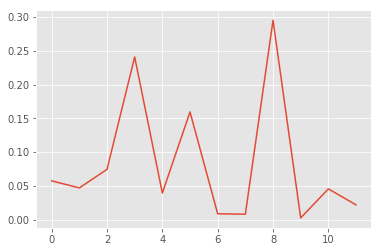

In [108]:
plt.plot(clfr2.feature_importances_)

In [109]:
clfr2.oob_score_

0.5813086954868636

In [110]:
clfxb = GridSearchCV(XGBClassifier(n_estimators=100),
                    param_grid={'n_estimators': [100, 200, 500]},
                    scoring="accuracy",
                    cv=5)
clfxb.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [111]:
clfxb.best_score_

0.4871297669290141